In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

<AxesSubplot:>

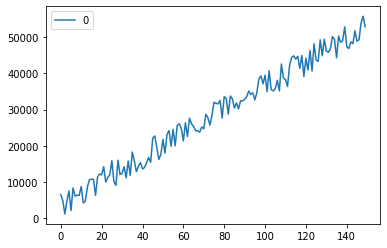

In [22]:
x = pd.DataFrame(np.cumsum(np.random.randint(150,500,150)) + np.random.randint(100,8000,150));x.plot()

<AxesSubplot:>

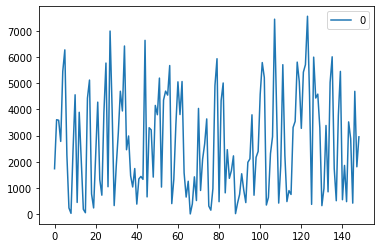

In [23]:
#First diff
xx = []
for i in range(0,149):
    xx.append(abs(x[0][i+1]-x[0][i]))
pd.DataFrame(xx).plot()

<AxesSubplot:>

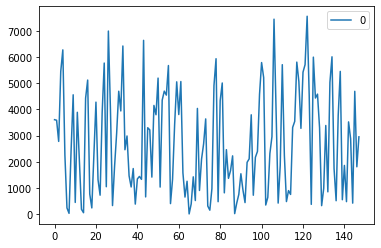

In [24]:
#Second diff
xx = []
for i in range(0,148):
    xx.append(abs(x[0][i+2]-x[0][i+1]))
pd.DataFrame(xx).plot()

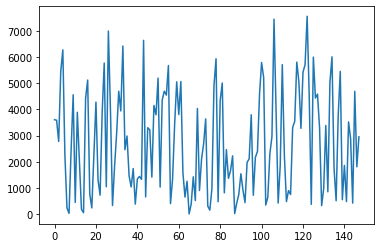

In [27]:
plt.plot([abs(x[0][i+2]-x[0][i+1]) for i in range(0,148)])

In [126]:
x1 = df['vals'].values;x1
x2 = df['vals'][2:8]
x2 = np.array(x2.append(pd.Series([0,0])))
# USING LIBRARY
np.corrcoef(x1,x2)[1][0]

-0.3665245183824906

In [125]:
print(' Yt  ',x1,'\n','Yt-2',x2)

 Yt   [ 8 12 16 14 15 19 16 20] 
 Yt-2 [16 14 15 19 16 20  0  0]


In [127]:
# MANUAL WAY OF FINDING OUT
sum((x1 - x1.mean())*(x2 - x2.mean()))/np.sqrt((sum((x1 - x1.mean())**2)*sum((x2 - x2.mean())**2)))

-0.3665245183824906

In [87]:
import scipy.stats as s
s.linregress(x1,x2)
s.pearsonr(x2,x1)

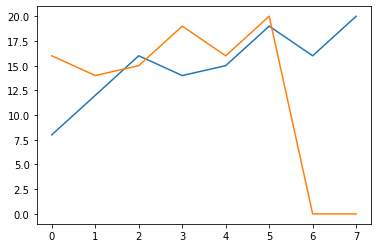

In [91]:
plt.plot(x1)
plt.plot(x2)

## Watson Durbin Test


In [128]:
df

,date,vals
0,1,8
1,2,12
2,3,16
3,4,14
4,5,15
5,6,19
6,7,16
7,8,20


In [129]:
from statsmodels.formula.api import ols

#fit multiple linear regression model
model = ols('vals~date', data=df).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   vals   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     18.83
Date:                Fri, 06 Nov 2020   Prob (F-statistic):            0.00488
Time:                        15:23:55   Log-Likelihood:                -15.852
No. Observations:                   8   AIC:                             35.70
Df Residuals:                       6   BIC:                             35.86
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.8929      1.579      5.632      0.0

C:\Users\Admin\miniconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [137]:
pd.DataFrame(model.resid,columns=['RESIDUALS']).mean()

RESIDUALS    7.993606e-15
dtype: float64

In [149]:
print('Model Resdiual Standard Dev {0}'.format(np.std(model.resid)))

Model Resdiual Standard Dev 1.7550946250436588


Text(0.5, 1.0, 'RESIDUAL PLOT')

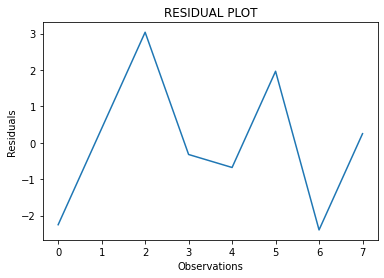

In [175]:
plt.plot(model.resid,)
plt.xlabel('Observations')
plt.ylabel('Residuals')
plt.title('RESIDUAL PLOT')

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

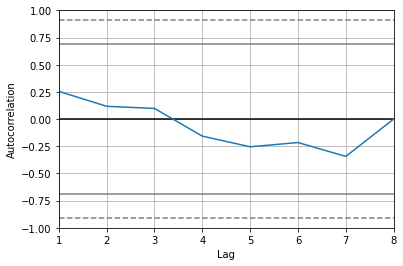

In [177]:
pd.plotting.autocorrelation_plot(df['vals'])

<AxesSubplot:ylabel='Density'>

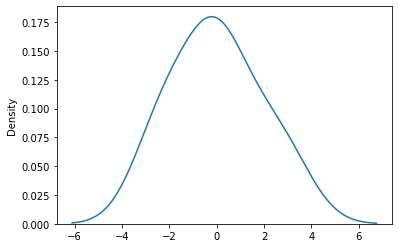

In [180]:
sns.kdeplot(model.resid)

In [187]:
def is_norm(x):
    p = s.shapiro(x).pvalue
    if p > .05:
        return('Sample looks Gaussian (fail to reject H0)')
    else:
        return('Sample does not look Gaussian (reject H0)')

is_norm(model.resid)

'Sample looks Gaussian (fail to reject H0)'

In [188]:
pd.DataFrame(model.resid).describe()

,0
count,8.000000e+00
mean,7.993606e-15
std,1.876275e+00
min,-2.392857e+00
25%,-1.071429e+00
50%,-3.571429e-02
75%,7.857143e-01
max,3.035714e+00
